In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.preprocessing import LabelBinarizer,StandardScaler

from sklearn import model_selection as cv
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt

from dbn.tensorflow import SupervisedDBNClassification
from sklearn.ensemble import RandomForestClassifier

import tensorflow.keras as K
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,GRU,BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [5]:
df = pd.read_csv('./dataset/joint/2.storke_combine_code_multi_balance.csv')

In [6]:
Y = np.array(df.pop('NIHSS'))
X = np.array(df)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state = 3)

In [8]:
Class = [0,1,2]
Class_dict = dict(zip(Class, range(len(Class))))
Class_dict
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
y_train_labels = lb.transform(y_train)

In [9]:
def Predict(X):
    RNN_test_label = []
    Class = [0,1,2]
    Class_dict = dict(zip(Class, range(len(Class))))
    Class_dict
    for i in range(0,X.shape[0]):
        RNN_test_label.append(Class_dict[np.argmax(X[i])])
    RNN_test_label = np.array(RNN_test_label,dtype = 'int64')
    return RNN_test_label

In [10]:
n_classes=3
y_test_label = label_binarize(y_test, classes=[0, 1, 2])

<font color=#0099ff  size=5 face="黑体">方法1：Decision Tree</font>

In [12]:
DT_classifier = tree.DecisionTreeClassifier(max_depth=3)
DT_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
DT_train_pred = DT_classifier.predict(x_train)
DT_test_pred = DT_classifier.predict(x_test)

In [14]:
DT_train_acc = accuracy_score(y_train, DT_train_pred)  
DT_test_acc = accuracy_score(y_test, DT_test_pred)  
DT_train_acc,DT_test_acc 

(0.7785388127853882, 0.7553191489361702)

In [15]:
print('ACC:', metrics.accuracy_score(y_test, DT_test_pred)) #预测准确率输出
 
print('macro-PRE:',metrics.precision_score(y_test, DT_test_pred,average='macro')) #预测宏平均精确率输出
 
print('macro-SEN:',metrics.recall_score(y_test, DT_test_pred,average='macro'))#预测宏平均召回率输出
 
print('macroF1-score:',metrics.f1_score(y_test, DT_test_pred,labels=[0,1,2],average='macro'))#预测宏平均f1-score输出
 
print('混淆矩阵输出:\n',metrics.confusion_matrix(y_test, DT_test_pred))#混淆矩阵输出
print('分类报告:\n', metrics.classification_report(y_test, DT_test_pred))#分类报告输出

ACC: 0.7553191489361702
macro-PRE: 0.5037142405563458
macro-SEN: 0.596244131455399
macroF1-score: 0.5441379310344827
混淆矩阵输出:
 [[56  0 15]
 [18  0 13]
 [ 0  0 86]]
分类报告:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        71
           1       0.00      0.00      0.00        31
           2       0.75      1.00      0.86        86

    accuracy                           0.76       188
   macro avg       0.50      0.60      0.54       188
weighted avg       0.63      0.76      0.69       188



C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\793971210.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


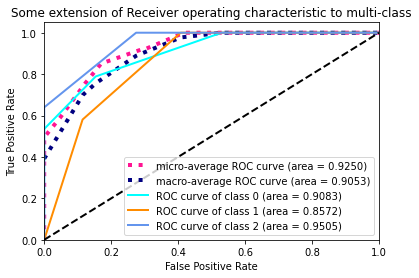

In [137]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], DT_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), DT_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


<font color=#0099ff  size=5 face="黑体">方法2：SVM 支持向量机</font>

训练集: 0.8744292237442922
测试集: 0.824468085106383


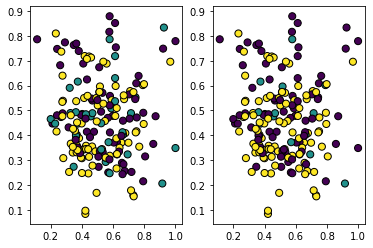

In [19]:
SVM_classifier = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', gamma=0.01,probability=True)
SVM_classifier.fit(x_train, y_train)

print("训练集:", SVM_classifier.score(x_train, y_train))
print("测试集:", SVM_classifier.score(x_test, y_test))
SVM_train_pred = SVM_classifier.predict(x_train)
SVM_test_pred = SVM_classifier.predict(x_test)
# comp = zip(y_test, SVM_test_predict)

plt.figure()
plt.subplot(121)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.reshape((-1)), edgecolors='k', s=50)
plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], c=SVM_test_pred.reshape((-1)), edgecolors='k', s=50)
plt.show()

In [20]:
print('ACC:', metrics.accuracy_score(y_test, SVM_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test, SVM_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test,  SVM_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test,  SVM_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.824468085106383
macro-PRE: 0.8271213322759715
macro-SEN: 0.7255511060863807
macroF1-score: 0.7411339714673414


In [21]:
SVM_test_proba = SVM_classifier.predict_proba(x_test)
SVM_test_proba

array([[8.92920165e-01, 9.15909099e-02, 1.54889248e-02],
       [4.13520191e-02, 6.58682648e-03, 9.52061154e-01],
       [9.74448907e-01, 1.79046101e-02, 7.64648327e-03],
       [2.58675907e-02, 7.75593901e-04, 9.73356815e-01],
       [1.46183467e-02, 7.93021513e-03, 9.77451438e-01],
       [9.97475479e-01, 1.41509593e-03, 1.10942515e-03],
       [7.21163608e-01, 2.11413247e-01, 6.74231447e-02],
       [3.63342084e-01, 2.39782049e-01, 3.96875866e-01],
       [1.27331793e-01, 8.31431901e-01, 4.12363054e-02],
       [5.51600865e-03, 9.93102387e-01, 1.38160462e-03],
       [8.70843707e-01, 5.31400731e-02, 7.60162204e-02],
       [9.17477680e-01, 8.20845989e-02, 4.37721417e-04],
       [5.86554975e-01, 4.12543982e-01, 9.01042945e-04],
       [9.80058498e-01, 1.26552814e-02, 7.28622028e-03],
       [9.91814895e-01, 4.43817551e-03, 3.74692919e-03],
       [5.02489562e-02, 9.45187280e-01, 4.56376404e-03],
       [1.04362991e-02, 9.14589618e-01, 7.49740827e-02],
       [6.02431169e-03, 6.34119

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\4000629193.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


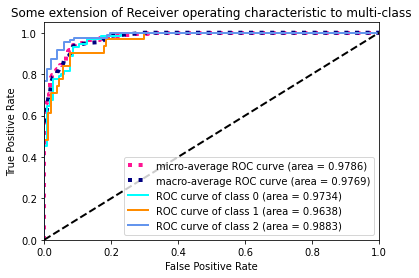

In [22]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], SVM_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), SVM_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


<font color=#0099ff  size=5 face="黑体">方法3：RF随机森林</font>

In [139]:
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion="gini",random_state=1)
RF_classifier.fit(x_train, y_train)
acu_test = RF_classifier.score(x_test, y_test)
acu_train = RF_classifier.score(x_train, y_train)
RF_train_pred = RF_classifier.predict(x_train)
RF_test_pred = RF_classifier.predict(x_test)
print(acu_train,acu_test)

0.9954337899543378 0.8776595744680851


In [140]:
PFacc = accuracy_score(y_test,RF_test_pred)
PFacc

0.8776595744680851

In [141]:
print('ACC:', metrics.accuracy_score(y_test, RF_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test, RF_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, RF_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, RF_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.8776595744680851
macro-PRE: 0.8527646363098759
macro-SEN: 0.7967308728590599
macroF1-score: 0.8113907284768213


In [142]:
RF_test_proba = RF_classifier.predict_proba(x_test)
RF_test_proba

array([[0.9, 0.1, 0. ],
       [0. , 0. , 1. ],
       [0.9, 0.1, 0. ],
       [0.3, 0. , 0.7],
       [0. , 0. , 1. ],
       [0.8, 0.2, 0. ],
       [0.4, 0.5, 0.1],
       [0.4, 0.3, 0.3],
       [0.2, 0.7, 0.1],
       [0.5, 0.2, 0.3],
       [0.8, 0. , 0.2],
       [0.8, 0. , 0.2],
       [0.6, 0.1, 0.3],
       [1. , 0. , 0. ],
       [0.8, 0.1, 0.1],
       [0.5, 0.2, 0.3],
       [0.3, 0.6, 0.1],
       [0.2, 0. , 0.8],
       [0.7, 0.2, 0.1],
       [0.1, 0.2, 0.7],
       [0.2, 0.4, 0.4],
       [0.5, 0.2, 0.3],
       [1. , 0. , 0. ],
       [0.4, 0.4, 0.2],
       [0.5, 0.2, 0.3],
       [0.1, 0. , 0.9],
       [0.3, 0.1, 0.6],
       [0.3, 0.2, 0.5],
       [0.9, 0.1, 0. ],
       [0.1, 0.2, 0.7],
       [0.7, 0.2, 0.1],
       [0.2, 0. , 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.5, 0.4, 0.1],
       [0.9, 0.1, 0. ],
       [0.4, 0.3, 0.3],
       [0.7, 0.2, 0.1],
       [0. , 0. , 1. ],
       [0.8, 0.1, 0.1],
       [0.5, 0.4, 0.1],
       [0.5, 0.3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\1844188362.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


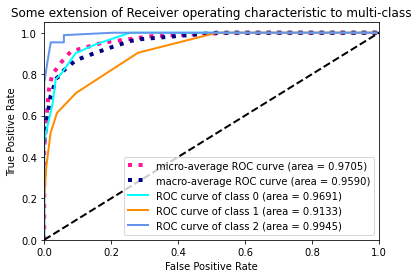

In [143]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], RF_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), RF_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


<font color=#0099ff  size=5 face="黑体">方法4：DNN </font>

In [28]:
def buildDNN(layer1,layer2,n_class):
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = tf.keras.optimizers.Adam()
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=layer1, input_dim=90, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=layer2, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])
    model.summary()
    return model

dnn = buildDNN(layer1=10,layer2=10,n_class=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                910       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________


In [36]:
b_size = 35
max_epochs = 500
print("Starting training ")
dnn.fit(x_train, y_train_labels, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1)

Starting training 
Train on 438 samples
Epoch 1/500
438/438 [==============================] - 0s 18us/sample - loss: 5.6070e-06 - acc: 1.0000
Epoch 2/500
438/438 [==============================] - 0s 16us/sample - loss: 5.5581e-06 - acc: 1.0000
Epoch 3/500
438/438 [==============================] - 0s 16us/sample - loss: 5.5964e-06 - acc: 1.0000
Epoch 4/500
438/438 [==============================] - 0s 25us/sample - loss: 5.8302e-06 - acc: 1.0000
Epoch 5/500
438/438 [==============================] - 0s 20us/sample - loss: 5.3787e-06 - acc: 1.0000
Epoch 6/500
438/438 [==============================] - 0s 18us/sample - loss: 5.4672e-06 - acc: 1.0000
Epoch 7/500
438/438 [==============================] - 0s 18us/sample - loss: 5.2873e-06 - acc: 1.0000
Epoch 8/500
438/438 [==============================] - 0s 16us/sample - loss: 5.2611e-06 - acc: 1.0000
Epoch 9/500
438/438 [==============================] - 0s 23us/sample - loss: 5.2320e-06 - acc: 1.0000
Epoch 10/500
438/438 [===========

In [37]:
dnn_train_proba = dnn.predict(x_train)
dnn_train_pred =Predict(dnn_train_proba)
dnn_test_proba = dnn.predict(x_test)
dnn_test_pred =Predict(dnn_test_proba)

In [38]:
dnn_train_acc =  accuracy_score(y_train, dnn_train_pred)
dnn_test_acc = accuracy_score(y_test, dnn_test_pred)
print("Dnn training with laryer  train score: {}".format(dnn_train_acc))
print("Dnn training with laryer  test score: {}".format(dnn_test_acc))

Dnn training with laryer  train score: 1.0
Dnn training with laryer  test score: 0.8670212765957447


In [40]:
print('ACC:', metrics.accuracy_score(y_test,dnn_test_pred))
 
print('macro-PRE:',metrics.precision_score(y_test,dnn_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, dnn_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, dnn_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.8670212765957447
macro-PRE: 0.8361568061568061
macro-SEN: 0.8552895266070039
macroF1-score: 0.8431759180398538


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\79143948.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


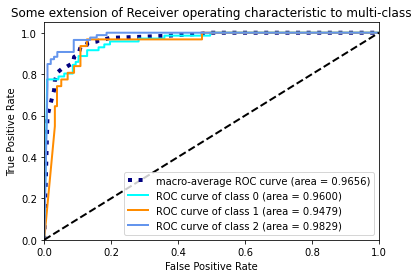

In [42]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], dnn_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), dnn_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# lw=2
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<font color=#0099ff  size=5 face="黑体">方法5：DBN </font>

In [97]:
#DBN
dbn_cant_neuronas_capas_ocultas =  "10,10"
RBM_cant_epocas_entrenamiento = 35 
Backprop_cant_epocas_entrenamiento = 500 

# cantidad de neuronas ocultas 
hidden_layers = []
for val in dbn_cant_neuronas_capas_ocultas.split(','):
      hidden_layers.append( int(val))

dbn = SupervisedDBNClassification(hidden_layers_structure = hidden_layers,
                                                learning_rate_rbm=0.05,
                                                learning_rate=0.1,
                                                n_epochs_rbm=RBM_cant_epocas_entrenamiento,
                                                n_iter_backprop=Backprop_cant_epocas_entrenamiento,
                                                batch_size=32,
                                                activation_function='relu',
                                                dropout_p=0.2,
                                               )

In [101]:
dbn.fit(x_train, y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 10.783374
>> Epoch 2 finished 	RBM Reconstruction error 11.571003
>> Epoch 3 finished 	RBM Reconstruction error 10.581892
>> Epoch 4 finished 	RBM Reconstruction error 9.994385
>> Epoch 5 finished 	RBM Reconstruction error 10.662485
>> Epoch 6 finished 	RBM Reconstruction error 9.825644
>> Epoch 7 finished 	RBM Reconstruction error 9.589712
>> Epoch 8 finished 	RBM Reconstruction error 9.099851
>> Epoch 9 finished 	RBM Reconstruction error 8.480506
>> Epoch 10 finished 	RBM Reconstruction error 7.912831
>> Epoch 11 finished 	RBM Reconstruction error 7.618590
>> Epoch 12 finished 	RBM Reconstruction error 7.844277
>> Epoch 13 finished 	RBM Reconstruction error 7.693492
>> Epoch 14 finished 	RBM Reconstruction error 7.542069
>> Epoch 15 finished 	RBM Reconstruction error 6.838403
>> Epoch 16 finished 	RBM Reconstruction error 7.047581
>> Epoch 17 finished 	RBM Reconstruction error 7.170108
>> Epoch 18 finished 	RBM 

SupervisedDBNClassification(batch_size=32, dropout_p=0.2,
                            idx_to_label_map={0: 0, 1: 1, 2: 2},
                            l2_regularization=1.0,
                            label_to_idx_map={0: 0, 1: 1, 2: 2},
                            learning_rate=0.1, n_iter_backprop=500,
                            verbose=True)

In [102]:
dbn_train_pred =dbn.predict(x_train)
dbn_test_pred =dbn.predict(x_test)
dbn_test_proba =dbn.predict_proba(x_test)

In [103]:
print(np.isnan(dbn_test_pred ).any())

False


In [104]:
dbn_train_acc =  accuracy_score(y_train, dbn_train_pred)
dbn_test_acc = accuracy_score(y_test, dbn_test_pred)
print("dbn training train score: {}".format(dbn_train_acc))
print("dbn training test score: {}".format(dbn_test_acc))

dbn training train score: 0.9680365296803652
dbn training test score: 0.8936170212765957


In [105]:
print('ACC:', metrics.accuracy_score(y_test,dbn_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test,dbn_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, dbn_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, dbn_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.8936170212765957
macro-PRE: 0.8711056644880174
macro-SEN: 0.8790894906825297
macroF1-score: 0.8735690235690236


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\1687146651.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


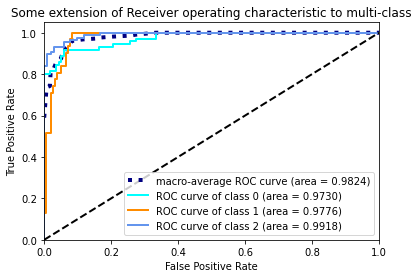

In [106]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], dbn_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), dbn_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<font color=#0099ff  size=5 face="黑体">方法6：LSTM-RNN</font>

In [90]:
def buildLSTM(timeStep,inputColNum,outStep,learnRate=1e-4):
    '''
    搭建LSTM网络，激活函数为tanh
    timeStep：输入时间步
    inputColNum：输入列数
    outStep：输出时间步
    learnRate：学习率    
    '''
    #输入层
    inputLayer = Input(shape=(timeStep,inputColNum))

    #中间层
    middle = LSTM(10,activation='tanh')(inputLayer)
    middle = Dense(10,activation='tanh')(middle)

    #输出层 全连接
    outputLayer = Dense(outStep)(middle)
    
    #建模
    model = Model(inputs=inputLayer,outputs=outputLayer)
    optimizer = Adam(learning_rate=learnRate)
    model.compile(optimizer=optimizer,loss='mse') 
    model.summary()
    return model

#搭建LSTM
lstm = buildLSTM(timeStep=1,inputColNum=90,outStep=3,learnRate=1e-4)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 90)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                4040      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 4,183
Trainable params: 4,183
Non-trainable params: 0
_________________________________________________________________


In [91]:
x_train_lstm = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test_lstm = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [92]:
epochs = 500 
batchSize = 35
lstm.fit(x_train_lstm,y_train_labels,epochs=epochs,verbose=1,batch_size=batchSize) 

Train on 438 samples
Epoch 1/500
438/438 [==============================] - 1s 1ms/sample - loss: 0.3372
Epoch 2/500
438/438 [==============================] - 0s 34us/sample - loss: 0.3239
Epoch 3/500
438/438 [==============================] - 0s 26us/sample - loss: 0.3117
Epoch 4/500
438/438 [==============================] - 0s 25us/sample - loss: 0.3003
Epoch 5/500
438/438 [==============================] - 0s 34us/sample - loss: 0.2898
Epoch 6/500
438/438 [==============================] - 0s 34us/sample - loss: 0.2799
Epoch 7/500
438/438 [==============================] - 0s 27us/sample - loss: 0.2706
Epoch 8/500
438/438 [==============================] - 0s 27us/sample - loss: 0.2620
Epoch 9/500
438/438 [==============================] - 0s 32us/sample - loss: 0.2540
Epoch 10/500
438/438 [==============================] - 0s 39us/sample - loss: 0.2468
Epoch 11/500
438/438 [==============================] - 0s 27us/sample - loss: 0.2400
Epoch 12/500
438/438 [=====================

In [93]:
LSTM_train_proba = lstm.predict(x_train_lstm)
LSTM_train_pred =Predict(LSTM_train_proba)
LSTM_test_proba = lstm.predict(x_test_lstm)
LSTM_test_pred =Predict(LSTM_test_proba)

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [94]:
LSTM_train_acc =  accuracy_score(y_train, LSTM_train_pred)
LSTM_test_acc = accuracy_score(y_test, LSTM_test_pred)
print("RNN training with laryer  train score: {}".format(LSTM_train_acc))
print("RNN training with laryer  test score: {}".format(LSTM_test_acc))

RNN training with laryer  train score: 0.9634703196347032
RNN training with laryer  test score: 0.9042553191489362


In [99]:
print('ACC:', metrics.accuracy_score(y_test,LSTM_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test,LSTM_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, LSTM_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, LSTM_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.9042553191489362
macro-PRE: 0.8739062164261747
macro-SEN: 0.8884791620440321
macroF1-score: 0.8799726282031641


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\3893804580.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


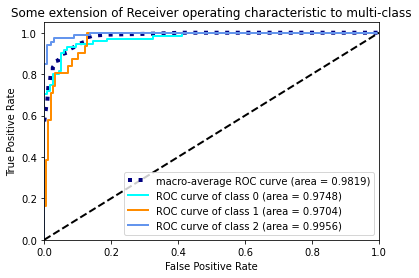

In [100]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], LSTM_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), LSTM_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<font color=#0099ff  size=5 face="黑体">方法7：Boosting</font>

In [119]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier


ADDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
ADDT.fit(x_train,y_train)
ADDT_test_pred = AD.predict(x_test)
ADDT_test_proba = AD.predict_proba(x_test)

In [120]:
print(accuracy_score(y_test,ADDT_test_pred) )

0.8829787234042553


In [121]:
print('ACC:', metrics.accuracy_score(y_test,ADDT_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test,ADDT_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, ADDT_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, ADDT_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.8829787234042553
macro-PRE: 0.8577164455855085
macro-SEN: 0.8548017286011643
macroF1-score: 0.8556745102412551


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\3779038638.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


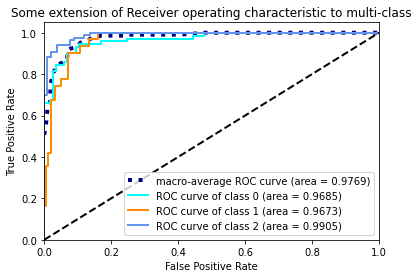

In [122]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], ADDT_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), ADDT_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

AD = AdaBoostClassifier()
AD.fit(x_train,y_train)
AD_test_pred = AD.predict(x_test)
AD_test_proba = AD.predict_proba(x_test)

In [128]:
print(accuracy_score(y_test, AD_test_pred))

0.7872340425531915


In [129]:
print('ACC:', metrics.accuracy_score(y_test,AD_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test,AD_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, AD_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, AD_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.7872340425531915
macro-PRE: 0.7420032840722496
macro-SEN: 0.732802919039619
macroF1-score: 0.733978939869543


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\2007215794.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


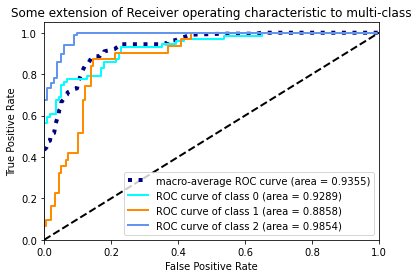

In [130]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], AD_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), AD_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<font color=#0099ff  size=5 face="黑体">方法8：Bagging</font>

In [131]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

BC = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(x_train,y_train)

In [132]:
BC_test_pred = BC.predict(x_test)
BC_test_proba = BC.predict_proba(x_test)
print(accuracy_score(y_test, BC_test_pred))

0.9042553191489362


In [133]:
print('ACC:', metrics.accuracy_score(y_test,BC_test_pred)) 
 
print('macro-PRE:',metrics.precision_score(y_test,BC_test_pred,average='macro')) 
 
print('macro-SEN:',metrics.recall_score(y_test, BC_test_pred,average='macro'))
 
print('macroF1-score:',metrics.f1_score(y_test, BC_test_pred,labels=[0,1,2],average='macro'))

ACC: 0.9042553191489362
macro-PRE: 0.8911083368012207
macro-SEN: 0.8694867378816534
macroF1-score: 0.8789265906507285


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7960\4082325927.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


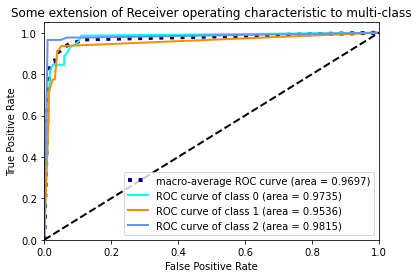

In [134]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], BC_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), BC_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()